# **Scikit-Learn을 이용하여 머신러닝 모델 만들어보기**

- 개요
  - 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
  - 파이썬 기반의 머신러닝은 곧 사이킷런으로 개발하는 것을 의미할 정도로 오랜 기간 파이썬 세계에서 인정받음
  - 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공함

- 특징
  - 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고, 가장 파이썬 스러운 API를 제공함
  - 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크, API를 제공
  - 오랜 기간 실전 환경에서 검증되었으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리 

## **1. 붓꽃의 품종 분류하기**

- 코드 출처: 파이썬 라이브러리를 활용한 머신러닝 (안드레아스 뮐러, 세라 가이도 저/박해선 역, 한빛미디어)

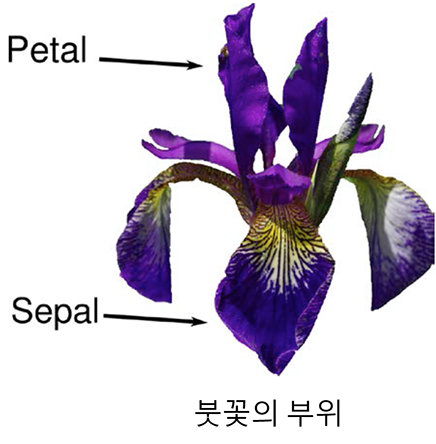

### 1-1. 데이터 적재

In [20]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [22]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [24]:
print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [26]:
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [27]:
print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 1-2. 성과 측정
##### 훈련 데이터와 테스트 데이터

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [29]:
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


In [30]:
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


### 1-3. 첫 번째 머신러닝 모델
##### k-최근접 이웃(KNN, K-Nearest Neighbors) 알고리즘

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 1-4. 예측하기

In [33]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [34]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", 
       iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


### 1-5. 모델 평가하기

In [35]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [36]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


### 1-6. 요약정리

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## **2. 데이터 전처리**
- 코드 출처: 파이썬 머신러닝 완벽 가이드 (권철민 저, 위키북스)

### 2-1. 레이블 인코딩(Label Encoding)

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np

In [39]:
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [40]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [41]:
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### 2-2. 원-핫 인코딩(One-Hot Encoding)

In [42]:
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [43]:
labels = labels.reshape(-1, 1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [44]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

oh_array = oh_labels.toarray()
print(oh_array)
print(oh_array.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


- Pandas의 get_dummies 함수를 이용하여 원핫인코딩 수행하기

In [45]:
df = pd.DataFrame({'items': items})
df

,items
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [46]:
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 2-3. 피처 스케일링 정규화

- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화: 피처의 각각의 값의 평균이 0 이고 분산이 1 인 값으로의 변환
  - StandardScaler
- 정규화: 각 피저의 범위를 일치시키기 위한 목적으로 최소값 0 ~ 최대값 1 사이의 값으로 변환
  - MinMaxScaler

In [47]:
iris = load_iris()
iris_data = iris.data

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 평균 값')
print(iris_df.mean())
print('\nfeature 분산 값')
print(iris_df.var())

feature 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [48]:
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 분산 값')
print(iris_df_scaled.var())

feature 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [49]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
type(iris_scaled)

numpy.ndarray

In [51]:
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('각 feature의 최소 값')
print(iris_df_scaled.min())

print('\n각 feature의 최대 값')
print(iris_df_scaled.max())

각 feature의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

각 feature의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 2-4. 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- 학습 데이터를 스케일링하여 학습을 수행한 경우
  - 테스트 데이터를 스케일링 하려면 반드시 학습 데이터의 기준으로 테스트 데이터를 스케일링해야 함
  - 테스트 데이터를 자체적으로 스케일링 할 경우, 불일치 발생
- 이런 문제를 피하기 위해서는 
  - 스케일링을 적용하려면 학습 데이터, 테스트 데이터를 분할하기 전에 전체 데이터를 스케일링 한 후, 데이터를 분할하도록 함

In [52]:
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [53]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('train_array 데이터:', train_array.reshape(-1))
print('train_scaled 데이터:', train_scaled.reshape(-1))

train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
train_scaled 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [54]:
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('test_array 데이터:', test_array.reshape(-1))
print('test_scaled 데이터:', test_scaled.reshape(-1))

test_array 데이터: [0 1 2 3 4 5]
test_scaled 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [55]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('train_array 데이터:', train_array.reshape(-1))
print('train_scaled 데이터:', train_scaled.reshape(-1))

# scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('test_array 데이터:', test_array.reshape(-1))
print('test_scaled 데이터:', test_scaled.reshape(-1))

train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
train_scaled 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test_array 데이터: [0 1 2 3 4 5]
test_scaled 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## **3. 타이타닉 생존자 예측**
- 코드출처: 파이썬 머신러닝 완벽 가이드 (권철민 저, 위키북스)

In [56]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [57]:
DATA_PATH = '/gdrive/My Drive/Colab Notebooks/20221024DS/01_DNN/data/'

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
titanic_csv_filepath = '{}{}'.format(DATA_PATH, 'titanic_train.csv')
titanic_df = pd.read_csv(titanic_csv_filepath)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [60]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None


In [62]:
titanic_df['age'].fillna(titanic_df['age'].mean(),inplace=True)
titanic_df['cabin'].fillna('N',inplace=True)
titanic_df['embarked'].fillna('N',inplace=True)

In [63]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,250644,19.5000,N,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,29103,23.0000,N,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,SC/PARIS 2148,13.8583,N,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,30.231444,0,0,36209,7.7250,N,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,334914,7.7250,N,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [64]:
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  1220


In [65]:
print('성별 분포 :\n',titanic_df['sex'].value_counts())

성별 분포 :
 male      581
female    335
Name: sex, dtype: int64


In [66]:
print('Cabin 값 분포 :\n',titanic_df['cabin'].value_counts())

Cabin 값 분포 :
 N              702
C23 C25 C27      5
C78              4
G6               4
C22 C26          3
              ... 
A9               1
E68              1
C30              1
E60              1
B78              1
Name: cabin, Length: 151, dtype: int64


In [67]:
print('Embarked 값 분포 :\n',titanic_df['embarked'].value_counts())

Embarked 값 분포 :
 S    652
C    179
Q     83
N      2
Name: embarked, dtype: int64


In [68]:
titanic_df['cabin'] = titanic_df['cabin'].str[:1]
print(titanic_df['cabin'].head(3))

0    N
1    N
2    N
Name: cabin, dtype: object


In [69]:
titanic_df.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            91
        1           244
male    0           472
        1           109
Name: survived, dtype: int64

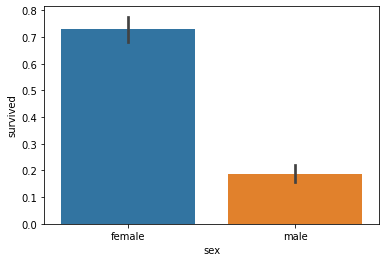

In [70]:
sns.barplot(x='sex', y = 'survived', data=titanic_df)

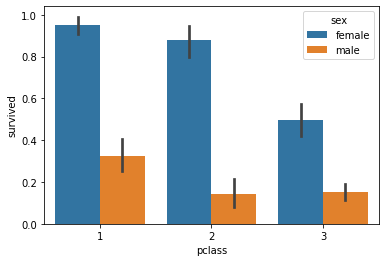

In [71]:
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_df)

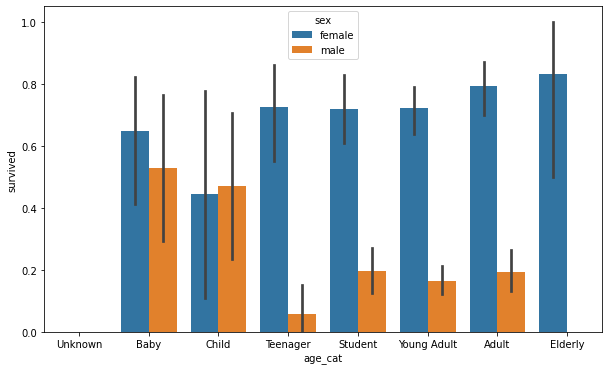

In [73]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['age_cat'] = titanic_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='age_cat', y = 'survived', hue='sex', data=titanic_df, order=group_names)
titanic_df.drop('age_cat', axis=1, inplace=True)

In [74]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['cabin', 'sex', 'embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",0,13.000000,0,1,250644,19.5000,7,3,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",0,4.000000,1,1,29103,23.0000,7,3,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",0,30.000000,1,0,SC/PARIS 2148,13.8583,7,0,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",1,30.231444,0,0,36209,7.7250,7,2,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",0,22.000000,0,0,334914,7.7250,7,2,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [75]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['age'].fillna(df['age'].mean(),inplace=True)
    df['cabin'].fillna('N',inplace=True)
    df['embarked'].fillna('N',inplace=True)
    df['fare'].fillna(0,inplace=True)
    return df

In [102]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['name','ticket', 'body', 'home.dest'],axis=1,inplace=True)
    return df

In [103]:
# 레이블 인코딩 수행. 
def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [104]:
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [105]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv(titanic_csv_filepath)
y_titanic_df = titanic_df['survived']
X_titanic_df= titanic_df.drop('survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,2,0,13.000000,0,1,19.5000,7,3
1,2,0,4.000000,1,1,23.0000,7,3
2,2,0,30.000000,1,0,13.8583,7,0
3,3,1,30.231444,0,0,7.7250,7,2
4,3,0,22.000000,0,0,7.7250,7,2
...,...,...,...,...,...,...,...,...
911,3,0,0.170000,1,2,20.5750,7,3
912,3,1,30.231444,0,0,8.0500,7,3
913,3,0,30.231444,0,0,7.7333,7,2
914,2,0,20.000000,0,0,36.7500,7,3


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [107]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
568,1,1,54.000000,1,0,55.4417,2,0
333,3,1,30.231444,0,0,7.7500,7,2
775,3,0,30.231444,0,0,7.7875,7,2
528,3,0,17.000000,0,0,14.4583,7,0
258,3,0,2.000000,0,1,10.4625,6,3
...,...,...,...,...,...,...,...,...
269,2,1,40.000000,0,0,13.0000,7,3
337,2,1,27.000000,0,0,13.0000,7,3
91,3,0,30.231444,0,0,7.7333,7,2
80,1,1,36.000000,0,0,75.2417,2,0


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7500
RandomForestClassifier 정확도:0.7826
LogisticRegression 정확도: 0.7663


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [109]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7935
교차 검증 1 정확도: 0.7158
교차 검증 2 정확도: 0.7432
교차 검증 3 정확도: 0.7596
교차 검증 4 정확도: 0.7814
평균 정확도: 0.7587


In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7935
교차 검증 1 정확도: 0.7268
교차 검증 2 정확도: 0.7158
교차 검증 3 정확도: 0.8033
교차 검증 4 정확도: 0.7814
평균 정확도: 0.7642


In [111]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8155
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.7663
